In [1]:
import math # math is used to perform some computations like factorial or binomial coefficient
from scipy import stats  # library for stats stuff, for example random variables
import numpy as np # library for scientific computing (dealing with arrays)
import matplotlib.pyplot as plt # library to plot

# Transformation of random variables
Consider the r.v. $X\sim Exp(1/\theta)$ and its transformation $Y=\log(X)$.

1.   Find the pdf of Y
2.   Find $\mathbb{P}(Y>0)$
3.   Find the median of $Y$

(array([264., 184., 132.,  94.,  78.,  58.,  48.,  33.,  19.,  22.,  12.,
         13.,   9.,   9.,   5.,   7.,   4.,   1.,   2.,   0.,   0.,   3.,
          1.,   1.,   1.]),
 array([3.64056515e-03, 5.92429212e-01, 1.18121786e+00, 1.77000650e+00,
        2.35879515e+00, 2.94758380e+00, 3.53637244e+00, 4.12516109e+00,
        4.71394974e+00, 5.30273838e+00, 5.89152703e+00, 6.48031568e+00,
        7.06910432e+00, 7.65789297e+00, 8.24668161e+00, 8.83547026e+00,
        9.42425891e+00, 1.00130476e+01, 1.06018362e+01, 1.11906248e+01,
        1.17794135e+01, 1.23682021e+01, 1.29569908e+01, 1.35457794e+01,
        1.41345681e+01, 1.47233567e+01]),
 <BarContainer object of 25 artists>)

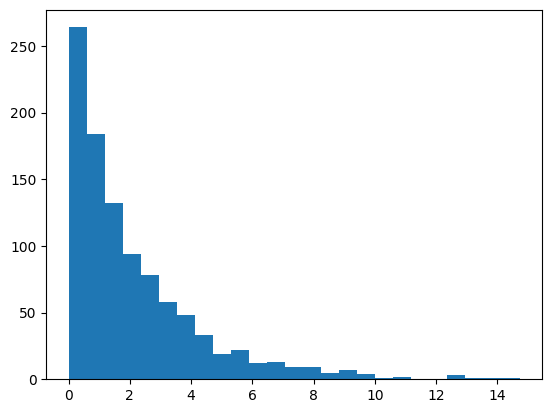

In [2]:
theta = 2

# define the exponential random variable using stats.expon. Pay attention to the parameters! https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
X = stats.expon(loc=0, scale=theta)

x = X.rvs(1000) # sample from X 1000 values

# let's plot the histogram of x using plt.hist
# set the number of bins=25
# you want this histogram to represent probabilities and not frequencies (find the argument that does this in the documentation of the function)
plt.hist(x, bins=25)

In [3]:
# instead of doing this empirically (by sampling 1000 values and then computing the histogram) we could directly use the pdf method of random variables
# X.pdf(x0) computes the pdf value corresponding to x0.
# since we want to plot the pdf, we need to compute the pdf on a vector of values (so x0 is going to be an array and not a scalar)
# looking at the previous figure, it makes sense to choose an array x0 that spans 0 to 15.
# To get it, we will use the np.arange (we already met this function!)
# specifying start, stop and step
x0 = np.arange(start=0, stop=15, step=0.2) # start, stop and steps don't need the keyword (but they need to follow this order!), but for clarity we will add them
y0 = X.pdf(x0)
print(x0)
print(y0)

[ 0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6
  2.8  3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4
  5.6  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2
  8.4  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.
 11.2 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8
 14.  14.2 14.4 14.6 14.8]
[5.00000000e-01 4.52418709e-01 4.09365377e-01 3.70409110e-01
 3.35160023e-01 3.03265330e-01 2.74405818e-01 2.48292652e-01
 2.24664482e-01 2.03284830e-01 1.83939721e-01 1.66435542e-01
 1.50597106e-01 1.36265897e-01 1.23298482e-01 1.11565080e-01
 1.00948259e-01 9.13417620e-02 8.26494441e-02 7.47843096e-02
 6.76676416e-02 6.12282141e-02 5.54015792e-02 5.01294219e-02
 4.53589766e-02 4.10424993e-02 3.71367891e-02 3.36027564e-02
 3.04050313e-02 2.75116100e-02 2.48935342e-02 2.25246012e-02
 2.03811020e-02 1.84415837e-02 1.66866350e-02 1.50986917e-02
 1.36618612e-02 1.23617632e-02 1.11853859e-02 1.01209557e-02
 9.157819

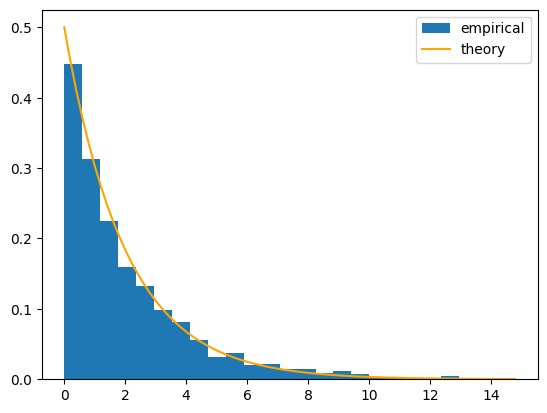

In [4]:
# now we have both the histogram and the precise values of the pdf, so we can overlay them to check the empirical version vs the theory
plt.hist(x, bins=25 , density=True, label='empirical')
# to plot the line, we use plt.plot()
plt.plot(x0, y0, color='orange', label='theory')
plt.legend() # this command adds the legend on the plot

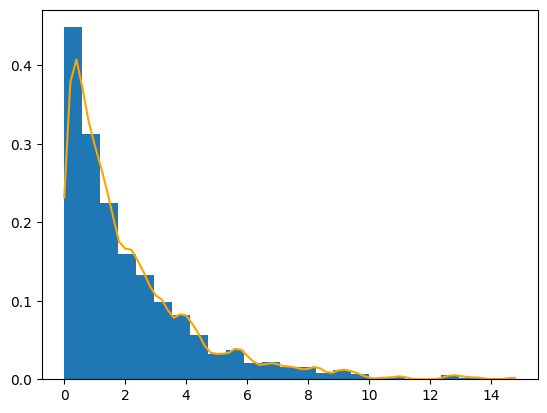

In [50]:
# EXTRA! A parallelism with computational tools for finance

# as you have seen during computational tools for finance, we can estimate the density of a random variable using not just the histogram, but more
# generally the kernel density estimation
# in python, we can use scikit-learn, which is a powerful statistics library
# https://scikit-learn.org/dev/modules/generated/sklearn.neighbors.KernelDensity.html

from sklearn.neighbors import KernelDensity # we need to import the desired function

plt.hist(x, bins=25 , density=True, label='empirical') # this is the histogram, as before
# to plot the line, we use plt.plot()
kde = KernelDensity(kernel="gaussian", bandwidth=0.2) # here we call the Kernel density method, specifying kernel and bandwith
# now we fit the method. Note that we need to reshape x using x.reshape(-1, 1)
# this procedure is requested by the method, which does not like as input a 1-dim array of length 1000 (as our x is), but wants a 2D-dim array of shape (1000, 1)
# to obtain it, we use the .reshape(a, b) method for np.arrays which reshapes the original array to shape a x b (with a and b integers). When we put -1, it
# means that the second dimension of the array will be deduced from the original shape and what is required in argument a (in our case, 1).
# Since x had shape 1000 (you can check with x.shape),  x.reshape(-1, 1) is goin to have as second dimension 1 and as first 1000 (there is no other way).
kde_fit = kde.fit(x.reshape(-1, 1))
log_dens = kde_fit.score_samples(x0.reshape(-1, 1)) # after fitting, we compute the y values using kde_fit.score_samples()
plt.plot(x0, np.exp(log_dens), color='orange', label='kernel density estimate') # we need to exponentiate log_dens

# PDF of Y

Let's plot the theoretical density function that we found on paper vs an estimate that we can get by sampling some values of y


In [67]:
# let's compute 1000 values sampled from the r.v. log(X) by using the vector of samples x
y = np.log(x)

In [68]:
# since we want to plot a function, we will compute a bunch of its values. Again, to specify the x axis values we need np.arange()
y_vector = np.arange(-6, 3, 0.01)
f_y_vector = np.exp(- np.exp(y_vector) / theta + y_vector) / theta # this is the function we computed on paper

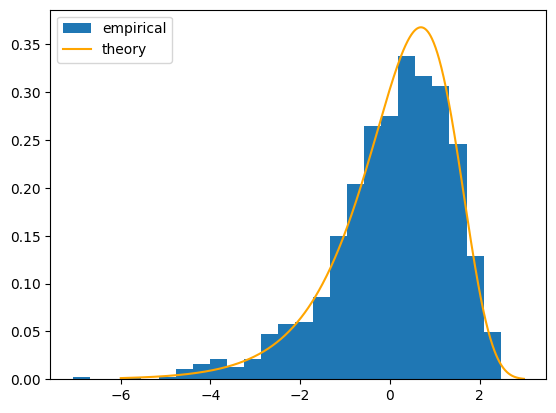

In [69]:
# plot histogram vs theory, as we did before
plt.hist(y, bins=25, density=True, label='empirical')
plt.plot(y_vector, f_y_vector, label='theory', color='orange')
plt.legend()

## $\mathbb{P}(Y>0)$

In [70]:
# estimate empirically P(Y>0) using the vector y computed in the previous point
print(np.sum(y>0) / len(y))

0.579


In [71]:
# theory value (computed on paper)
np.exp(-1/theta)

0.6065306597126334

In [72]:
# we can also use the CDF of X to obtain the exact answer: P(Y>0) = 1-P(log(X)<=0) = 1-P(X<=exp(0))
1-X.cdf(np.exp(0))

0.6065306597126334

## Median of $Y$

In [73]:
# compute the empirical median of Y
np.median(y)

0.3088474351429727

In [74]:
# compute the theoretical value
np.log(theta*np.log(2))

0.32663425997828094

In [75]:
# if we want to pass from X we need to find the value y_med such that
# P(Y>y_med) = 1-P(X<=exp(y_med)) = 0.5
# which means equivalently P(X<=exp(y_med)) = 0.5
# this can be found using the ppf (percent point function, the inverse of the cdf)
a = X.ppf(0.5)
# now a = exp(y_med), therefore
y_med = np.log(a)
print(y_med)

0.32663425997828094


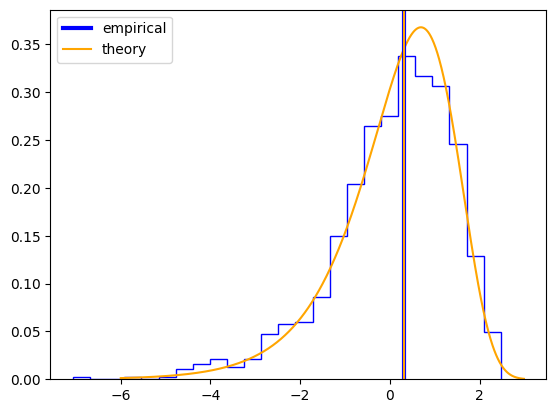

In [82]:
# plot the histogram of y and on top of it the vertical lines that represent the empirical and theoretical medians
plt.hist(y, bins=25, density=True, color='blue', histtype='step') # I am using the argument histtype='step' to have no coloured filling inside the histogram, you'll see why
plt.plot(y_vector, f_y_vector, color='orange')
# to plot vertical lines, in python we can use plt.axvline(x=...), where the first argument is the x value that identifies the line
# if you were to plot an horizontal line, you could use plt.axhline(y=...)
plt.axvline(x=np.median(y), linewidth=3, color='blue', label='empirical') # I am using the command linewidth=3 to have a thicker line, in case the two vertical lines overlap too much
plt.axvline(x=np.log(theta*np.log(2)), color='orange', label='theory')
plt.legend()